In [37]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rosbag

# from geometry_msgs.msg import Point, Quaternion, Vector3
# from snapstack_msgs.msg import State, Goal, AttitudeCommand, ControlLog, QuadFlightMode

plt.rcParams.update({'font.size': 24})

In [38]:
# filename_coml = 'coml_figure_eight_wind_0.bag'
# filename_pid = 'pid_figure_eight_wind_0.bag'

# filename_coml = 'coml_circle_wind_0.bag'
# filename_pid = 'pid_circle_wind_0.bag'

# filename_pid = 'pid_figure_eight_wind_10.bag'
# filename_coml = 'coml_figure_eight_wind_10.bag'

# filename_coml = 'coml_circle_wind_10.bag'
# filename_pid = 'pid_circle_wind_10.bag'

# filename_coml = 'coml_circle_wind_sine.bag'
# filename_pid = 'pid_circle_wind_sine.bag'

filename_coml = 'coml_figure_eight_wind_sine.bag'
filename_pid = 'pid_figure_eight_wind_sine.bag'     

b_coml = bagreader(f'../rosbags/{filename_coml}')
b_pid = bagreader(f'../rosbags/{filename_pid}')

# replace the topic name as per your need
topic_log_coml = b_coml.message_by_topic('/HX14s/log')
topic_log_pid = b_pid.message_by_topic('/HX14s/log')
# topic_log = b_coml.message_by_topic('/HX14/log')

df_log_coml = pd.read_csv(topic_log_coml)
df_log_pid = pd.read_csv(topic_log_pid)

[INFO]  Data folder ../rosbags/coml_figure_eight_wind_sine already exists. Not creating.
[INFO]  Data folder ../rosbags/pid_figure_eight_wind_sine already exists. Not creating.


In [39]:
def avg_tracking_error(df_log):
    err_x = df_log['p_err.x'].to_numpy()
    err_y = df_log['p_err.y'].to_numpy()
    err_z = df_log['p_err.z'].to_numpy()
    total_err = np.vstack((err_x, err_y, err_z)).T # T x 3
    avg_tracking_error = np.mean(np.linalg.norm(total_err, axis=1))
    print('avg tracking error = ', avg_tracking_error)

    return avg_tracking_error

avg_tracking_error(df_log_coml)
avg_tracking_error(df_log_pid)

avg tracking error =  0.20755967825244478
avg tracking error =  0.7495686377958062


0.7495686377958062

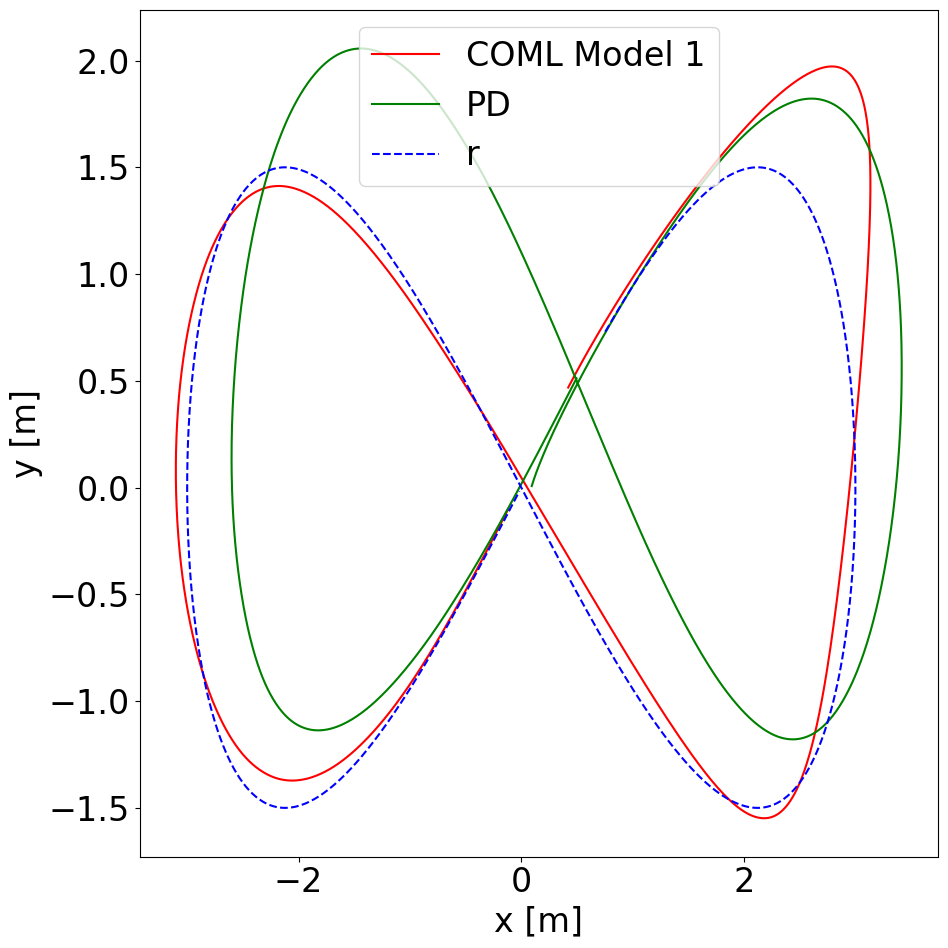

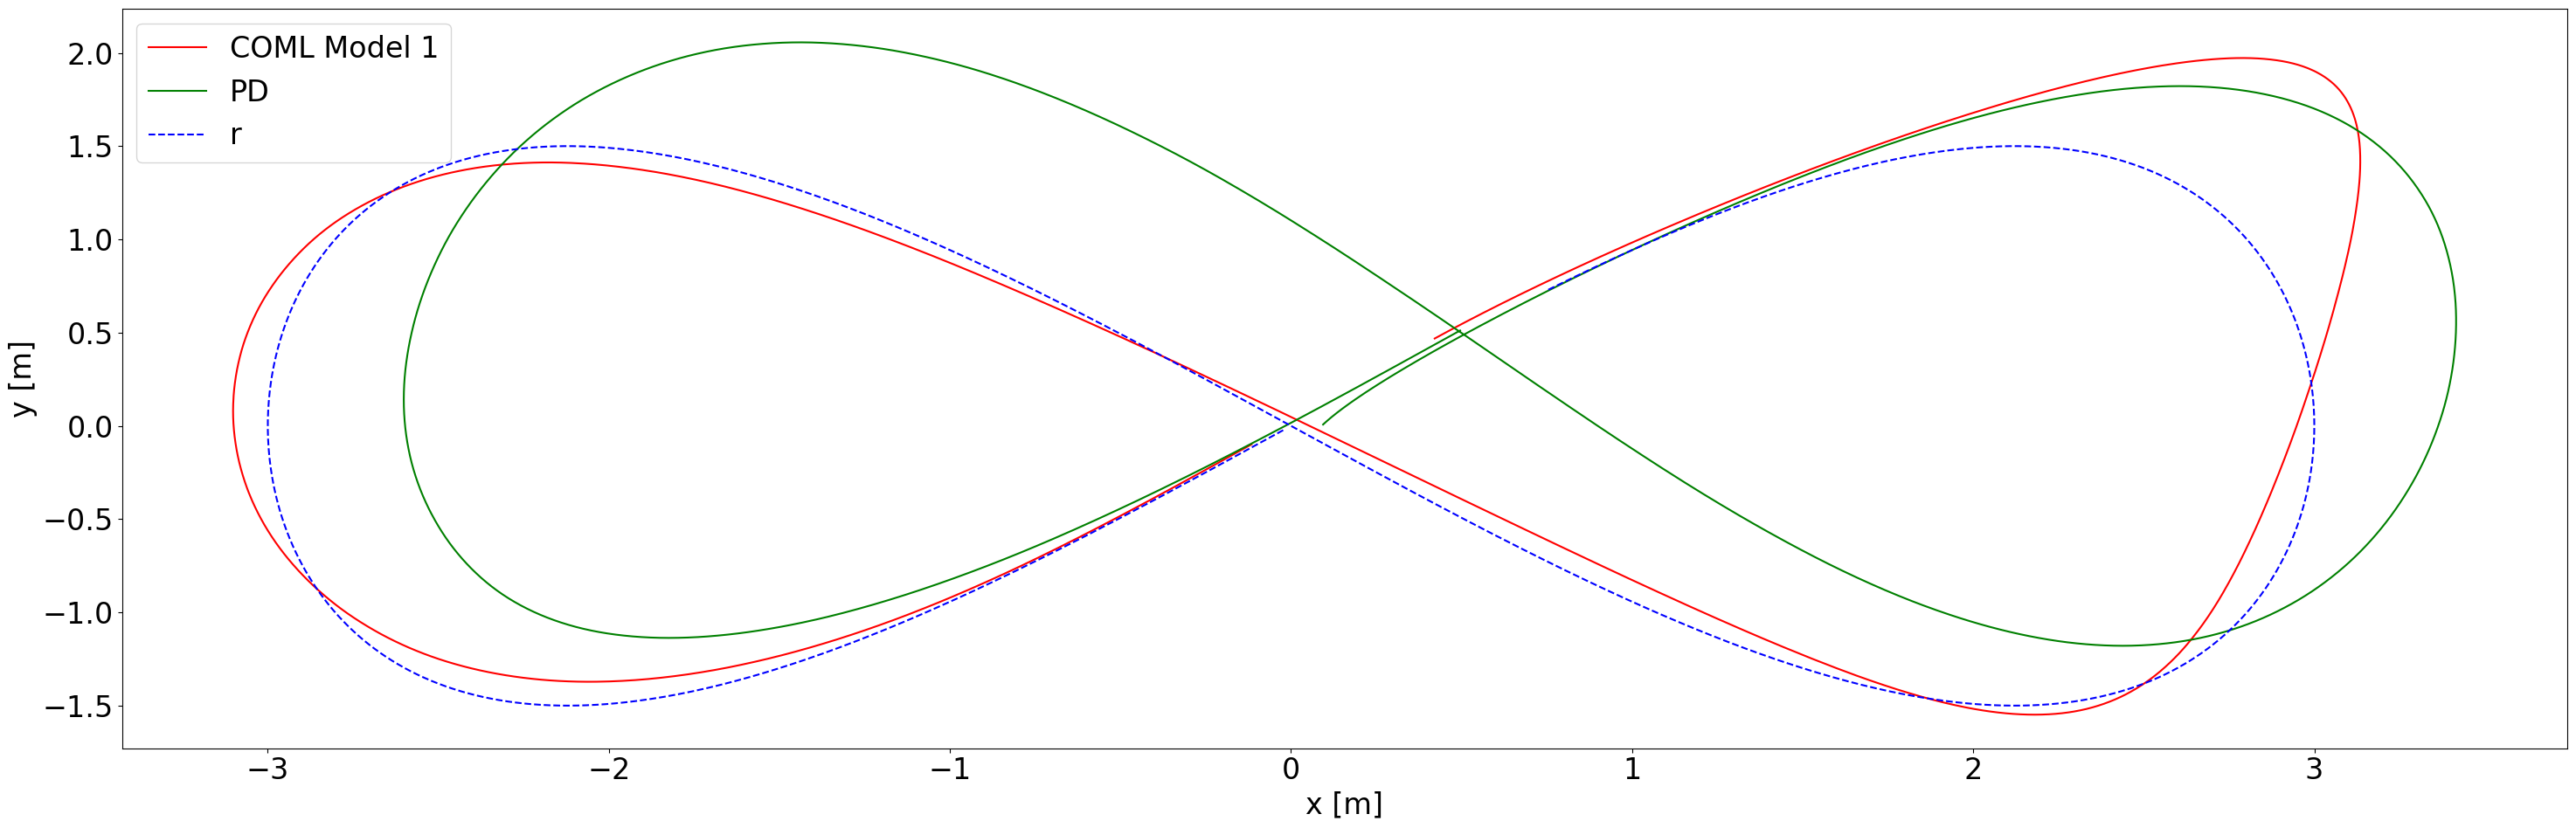

In [40]:
def plot(df_log_coml, df_log_pid, square=False):
    # Parametric
    if square:
        plt.figure(figsize=(10, 10))
    else:
        plt.figure(figsize=(30, 10))

    plt.plot(df_log_coml['p.x'], df_log_coml['p.y'], 'r-', label='COML Model 1')
    plt.plot(df_log_pid['p.x'], df_log_pid['p.y'], 'g-', label='PD')
    plt.plot(df_log_coml['p_ref.x'], df_log_coml['p_ref.y'], 'b--', label='r')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    
    plt.legend()
    # plt.title('Parametric Position')
    plt.tight_layout()
    plt.show()

plot(df_log_coml, df_log_pid, True)
plot(df_log_coml, df_log_pid, False)

